import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline

In [65]:
# Load the dataset
df = pd.read_csv('../data/failed_bank_USA.csv')
df.head(10)

,Bank_Name,City,State,Assets_millions,Deposits_millions,Estimated_Loss_millions,Acquiring_Institution,Closing_Date
0,Signature Bank,New York,NY,110.360001,88.610001,2.40,"Signature Bridge Bank, N.A.",2023-03-12
1,Silicon Valley Bank,Santa Clara,CA,209.029999,175.380005,16.10,"Silicon Valley Bridge Bank, N.A.",2023-03-07
2,Almena State Bank,Almena,KS,0.070000,0.060000,0.02,Equity Bank,2020-10-23
3,First City Bank Of Florida,Fort Walton Beach,FL,0.140000,0.130000,0.01,"United Fidelity Bank, fsb",2020-10-16
4,The First State Bank,Barboursville,WV,0.150000,0.140000,0.05,"MVB Bank, Inc.",2020-04-03
5,The First State Bank,Stockbridge,GA,0.520000,0.510000,0.19,"MVB Bank, Inc.",2012-01-20
6,The First State Bank,Camargo,OK,0.040000,0.040000,0.03,"MVB Bank, Inc.",2011-01-28
7,Ericson State Bank,Ericson,NE,0.100000,0.100000,0.02,Farmers and Merchants Bank,2020-02-14
8,City National Bank Of New Jersey,Newark,NJ,0.120000,0.110000,0.00,Industrial Bank,2019-11-01
9,Resolute Bank,Maumee,OH,0.020000,0.020000,0.00,Buckeye State Bank,2019-10-25


In [66]:
# Shape and columns
print("Shape:", df.shape)
print("\nColumns:", df.columns)

# Data types and null counts
print("\nInfo:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

# Quick stats
df.describe(include='all')

Shape: (528, 8)

Columns: Index(['Bank_Name', 'City', 'State', 'Assets_millions', 'Deposits_millions',
       'Estimated_Loss_millions', 'Acquiring_Institution', 'Closing_Date'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bank_Name                528 non-null    object 
 1   City                     528 non-null    object 
 2   State                    528 non-null    object 
 3   Assets_millions          528 non-null    float64
 4   Deposits_millions        528 non-null    float64
 5   Estimated_Loss_millions  528 non-null    float64
 6   Acquiring_Institution    528 non-null    object 
 7   Closing_Date             528 non-null    object 
dtypes: float64(3), object(5)
memory usage: 33.1+ KB

Missing values:
Bank_Name                  0
City                       0
State               

,Bank_Name,City,State,Assets_millions,Deposits_millions,Estimated_Loss_millions,Acquiring_Institution,Closing_Date
count,528,528,528,528.000000,528.000000,528.000000,528,528
unique,467,379,42,NaN,NaN,NaN,257,220
top,Premier Bank,Chicago,GA,NaN,NaN,NaN,No Acquirer,2009-10-30
freq,9,18,86,NaN,NaN,NaN,25,9
mean,NaN,NaN,NaN,1.469432,1.216477,0.151534,NaN,NaN
std,NaN,NaN,NaN,11.428253,9.431794,0.772985,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.100000,0.100000,0.020000,NaN,NaN
50%,NaN,NaN,NaN,0.205000,0.190000,0.040000,NaN,NaN
75%,NaN,NaN,NaN,0.490000,0.440000,0.100000,NaN,NaN


In [67]:
# Convert Closing_Date to datetime
df['Closing_Date'] = pd.to_datetime(df['Closing_Date'])

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Duplicates: 0


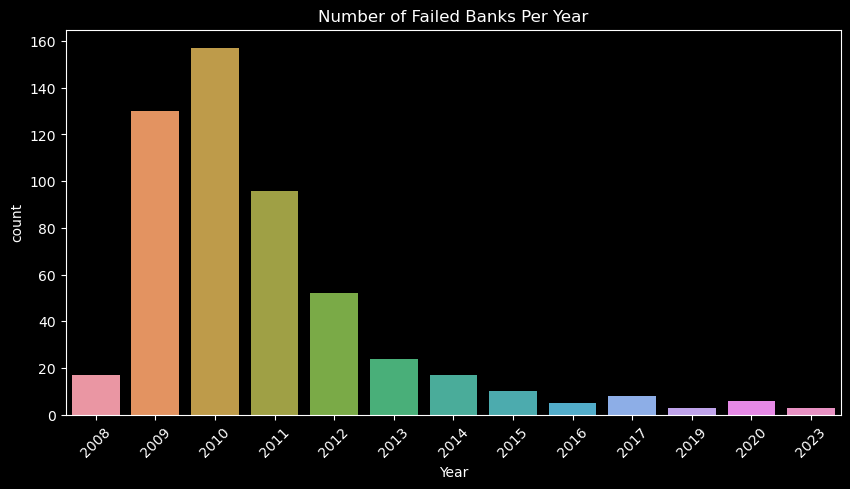

In [68]:
# Add a Year column
df['Year'] = df['Closing_Date'].dt.year

# Plot number of failed banks per year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()))
plt.title('Number of Failed Banks Per Year')
plt.xticks(rotation=45)
plt.show()

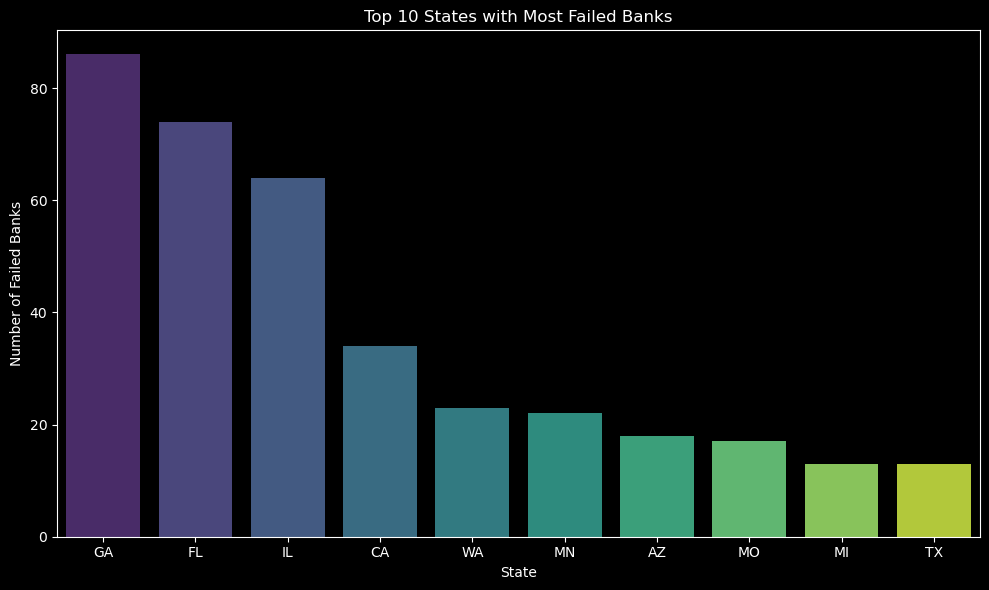

In [69]:

state_counts = df['State'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Top 10 States with Most Failed Banks')
plt.xlabel('State')
plt.ylabel('Number of Failed Banks')
plt.tight_layout()
plt.show()